In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


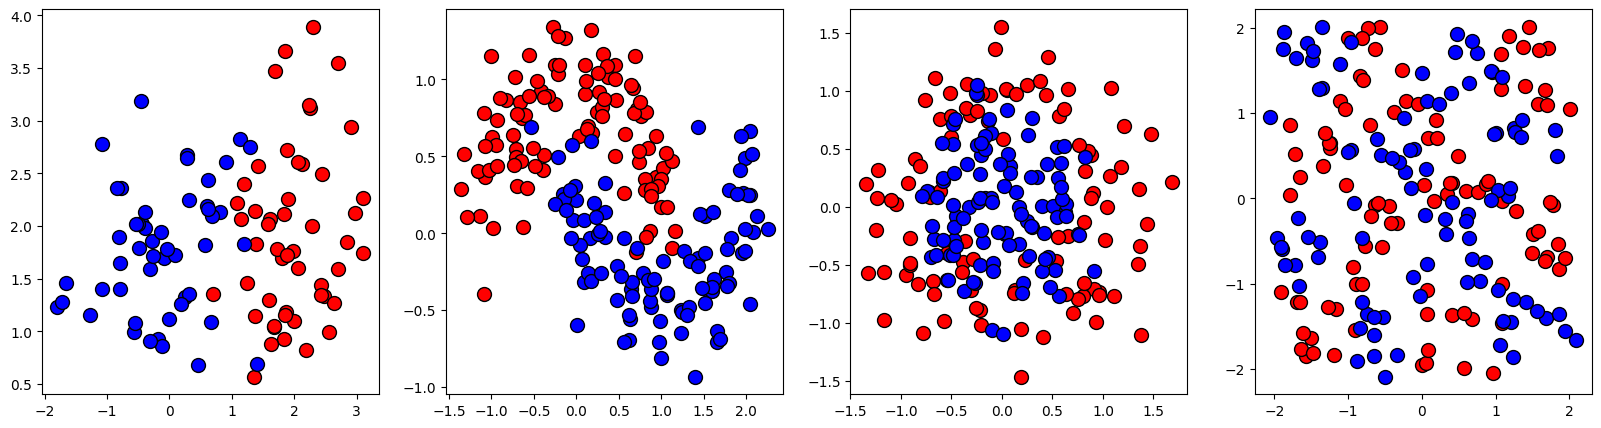

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

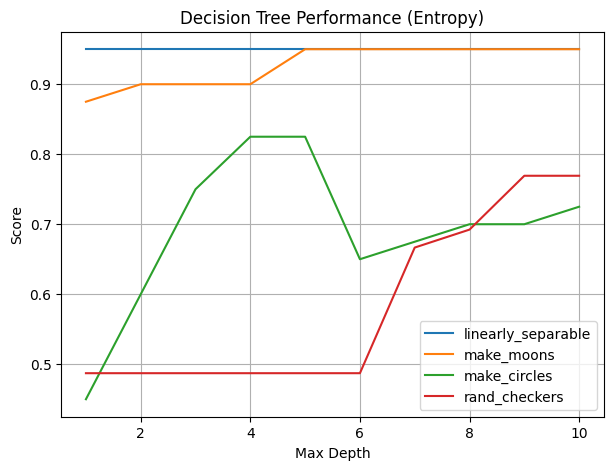

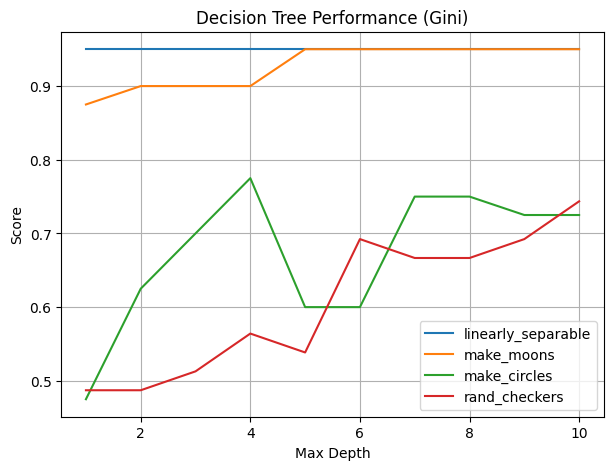

best impurity classification


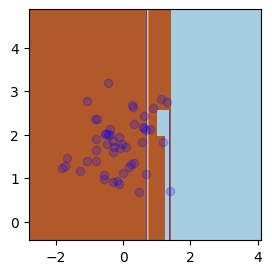

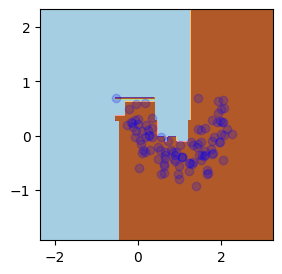

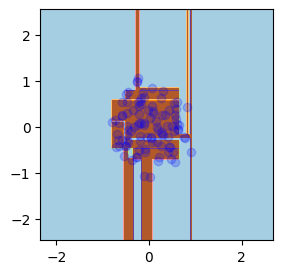

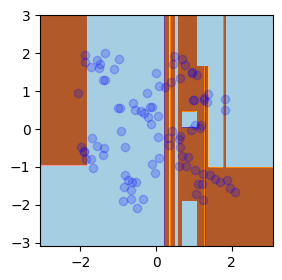

Classifying the dataset 2 using the entropy impurity and best score for the said dataset


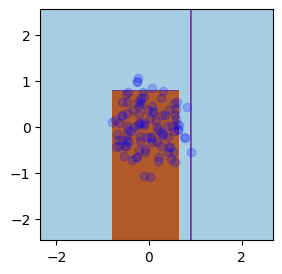

In [6]:
scores_gini = []
scores_entropy = []


for fi in range(len(datasets)):
    max_depth_list_gini = []
    max_depth_list_entropy = []
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
    
    for i in range(1,11):
        gini = DecisionTreeClassifier(criterion='gini',max_depth=i)
        entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
        gini.fit(X_train,y_train)
        entropy.fit(X_train,y_train)
        score_gini = gini.score(X_test,y_test)
        score_entropy = entropy.score(X_test,y_test)
        max_depth_list_gini.append(score_gini)
        max_depth_list_entropy.append(score_entropy)    
    
    scores_gini.append(max_depth_list_gini)
    scores_entropy.append(max_depth_list_entropy)

scores_entropy = np.array(scores_entropy)
scores_gini = np.array(scores_gini) 



label = ['linearly_separable', 'make_moons', 'make_circles', 'rand_checkers']

num_datasets = 4

plt.figure(figsize=(7, 5))
plt.ylabel("Score")
plt.xlabel("Max Depth")
for i in range(num_datasets):
    plt.plot(range(1, 11), scores_entropy[i, :], label=label[i])  # Fix x-axis values

plt.legend()
plt.title("Decision Tree Performance (Entropy)")
plt.grid()
plt.show()

plt.figure(figsize=(7, 5))
plt.ylabel("Score")
plt.xlabel("Max Depth")
for i in range(num_datasets):
    plt.plot(range(1, 11), scores_gini[i, :], label=label[i])  

plt.legend()
plt.title("Decision Tree Performance (Gini)")
plt.grid()
plt.show()

# Question 2
print(f"best impurity classification")
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    best_tree.fit(X,y)
    plot_tree(best_tree, X, y)

# Question 3
print(f"Classifying the dataset 2 using the entropy impurity and best score for the said dataset")
dataset_2 = datasets[2]
best_tree_circle = DecisionTreeClassifier(criterion='entropy', max_depth=np.argmax(scores_entropy[2,:]))
X = dataset_2[0]
y = dataset_2[1]
best_tree_circle.fit(X,y)
plot_tree(best_tree_circle, X, y)


# Ensembles
## Exercise 4, random forest

In [7]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
regressor = RandomForestRegressor()
scores_regression = cross_val_score(regressor, X_diabetes, y_diabetes)
R_sqr = np.mean(scores_regression)
print(f"The regression coefficient of the regression is: {R_sqr}")


# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
classifier = RandomForestClassifier()
scores_classfication = cross_val_score(regressor, X_iris, y_iris)
accuracy = np.mean(scores_classfication)
print(f"Accuracy of the model for iris is: {accuracy}")


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
classifier = RandomForestClassifier()
scores_classfication = cross_val_score(regressor, X_iris, y_iris)
accuracy = np.mean(scores_classfication)
print(f"Accuracy of the model for Digits is: {accuracy}")




The regression coefficient of the regression is: 0.4234829603584517
Accuracy of the model for iris is: 0.9472958876025122
Accuracy of the model for Digits is: 0.9464705092306666


## Exercise 5, feature importance

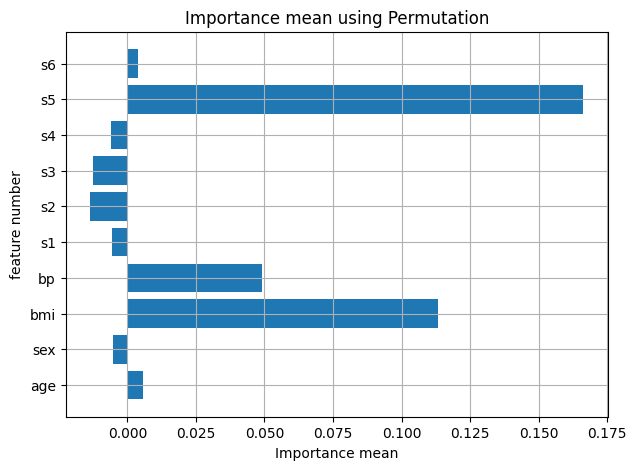

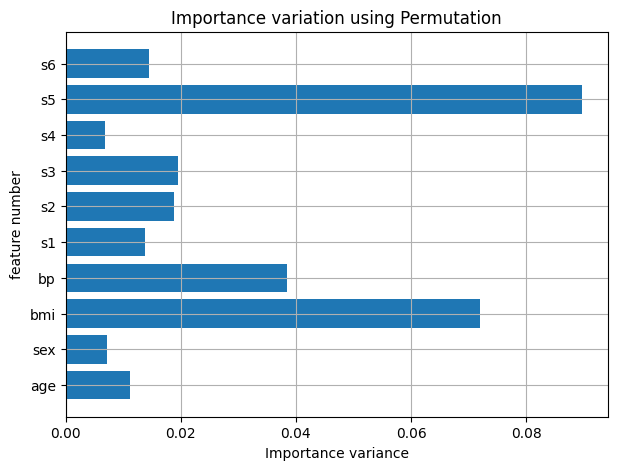

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
result = permutation_importance(regressor, X_test, y_test, n_repeats=30 ,random_state=0)


importances = result.importances_mean
variance = result.importances_std


plt.figure(figsize=(7,5))
plt.barh(diabetes.feature_names, importances)
plt.xlabel("Importance mean")
plt.ylabel("feature number")
plt.title("Importance mean using Permutation")
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.barh(diabetes.feature_names, variance)
plt.xlabel("Importance variance")
plt.ylabel("feature number")
plt.title("Importance variation using Permutation")
plt.grid()
plt.show()



# Regression
## Exercise 6

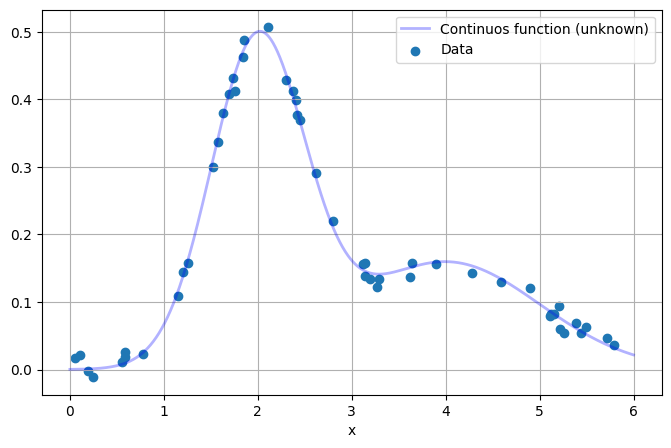

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

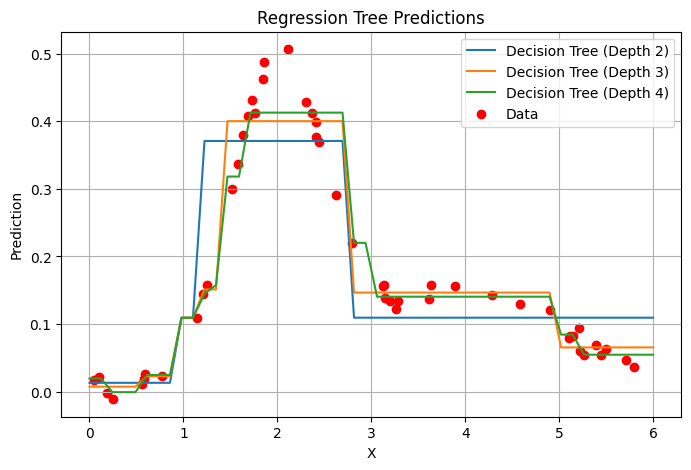

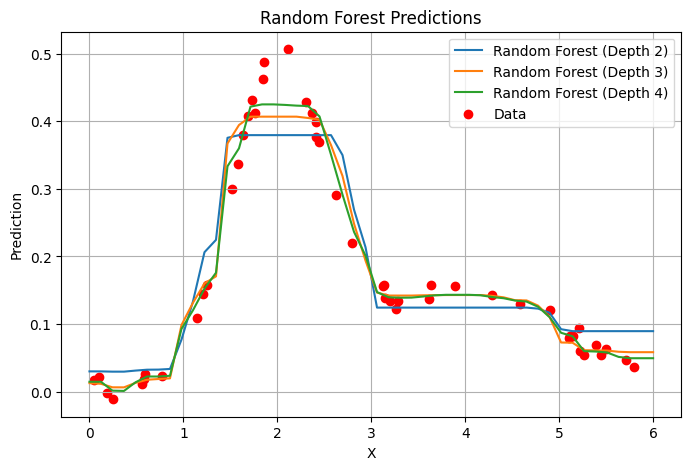

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


X = np.array(Xr).reshape(-1, 1)
y = np.array(yr).reshape(-1, 1)

# Generate test data
X_test = np.linspace(0, 6, 50).reshape(-1, 1)

prediction_tree = []
prediction_forest = []


for i in [2, 3, 4]:
    regressor_tree = DecisionTreeRegressor(max_depth=i)
    regressor_forest = RandomForestRegressor(max_depth=i) 

    regressor_tree.fit(X, y.flatten())
    regressor_forest.fit(X, y.flatten())

    prediction_tree.append(regressor_tree.predict(X_test))
    prediction_forest.append(regressor_forest.predict(X_test))

prediction_forest = np.array(prediction_forest)
prediction_tree = np.array(prediction_tree)

plt.figure(figsize=(8, 5))
for i in range(len(prediction_tree)):
    plt.plot(X_test, prediction_tree[i, :], label=f"Decision Tree (Depth {i+2})")

plt.scatter(X, y, color="red", label="Data")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.title("Regression Tree Predictions")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(8, 5))
for i in range(len(prediction_forest)):
    plt.plot(X_test, prediction_forest[i, :], label=f"Random Forest (Depth {i+2})")

plt.scatter(X, y, color="red", label="Data")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.title("Random Forest Predictions")
plt.legend()
plt.grid()
plt.show()


# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

In [25]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_bellow_threshold = None
    self.class_above_threshold = None
    self.best_ev = None
  def get_threshold(self): 
      return self.best_threshold
  def get_best(self): 
      return self.best_dimension,  self.best_threshold, self.best_ev
    
  def fit(self,X,y, sample_weight=None): 

    if sample_weight is None: 
       sample_weight = np.ones(len(X))
    
    best_ev = None
    region = [X.min(axis=0), X.max(axis=0)]
    n_samples, n_features = X.shape
    for dimension in [0,1]:
      # we evaluate all the possible partitions incrementally
      # at the beggining we assume that all datapoints are in the 'right' partition
      # at the end, they will all in be the 'left' partition
      pass
    

  def predict(self,X) :
    res = []
    for x in X[:,self.best_dimension]:
      if x < self.best_threshold :
        res.append(self.class_bellow_threshold)
      else:
         res.append(self.class_above_threshold)

    return res


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 

my_stump = My_stump()
w = np.ones(len(X))/len(X)
my_stump.fit(X, y, w)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf,X,y)

TypeError: '<' not supported between instances of 'float' and 'NoneType'

<Figure size 300x300 with 0 Axes>

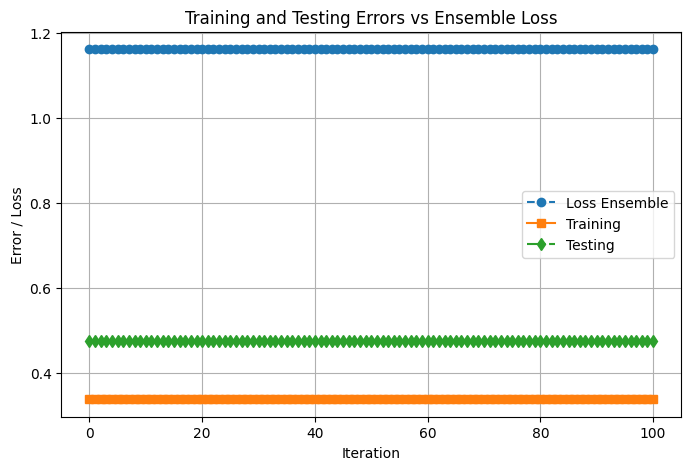

In [60]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
def compute_error(y, y_pred, w_m):
    return np.sum(w_m * (y != y_pred))

def compute_alpha(error):
    if error == 0:
        return 1
    return 1/2 * np.log((1-error) /error )

def update_weights(w_i, alpha, y, y_pred, error):
    return w_i * np.exp(alpha * y * y_pred)
    

class AdaBoost:
    
    def __init__(self):
        self.alphas = [] # list of coefficients for the classifiers
        self.G_M = [] # list of wesk clssifier
        self.M = None # number of iterations
        # we save the error for plotting the evoltion of the performance
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
    
    def predict(self, X):
        prediction = np.zeros(X.shape[0])
        for alpha , h in zip(self.alphas, self.G_M):
            prediction += alpha * h.predict(X)
        return np.sign(prediction) 

    def fit(self, X, y, M = 1, X_test=None, y_test=None):
        self.alphas = [] 
        self.training_errors, self.testing_errors = [],[]
        self.M = M
        Z=1
        w_m = np.ones(len(y))/ len(y)  

        # Iterate over M weak classifiers
        for m in range(0, M):
            # Set weights for current boosting iteration
            
            G_m = DecisionTreeClassifier(max_depth = 1) # Stump from sklearn
            G_m.fit(X, y, sample_weight = w_m)
            y_pred = G_m.predict(X)
            
            error_m = compute_error(y, y_pred, w_m)
            alpha_m = compute_alpha(error_m) 
            w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)
            w_m /= np.sum(w_m)

            self.G_M.append(G_m)
            self.alphas.append(alpha_m)

            if y_test is not None and X_test is not None:
                test_pred = self.predict(X_test)
                test_error = np.mean(test_pred != y_test)
                self.testing_errors.append(test_error)

            train_predict = self.predict(X)
            training_error = np.mean(y != train_predict)
            self.training_errors.append(training_error)

            loss = np.sum(np.exp(-y * y_pred)) / len(y)
            self.loss_ensemble.append(loss)
        

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1 # For the AdaBoost y={-1,+1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M = 101, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()

# AUC ROC - AUC PR

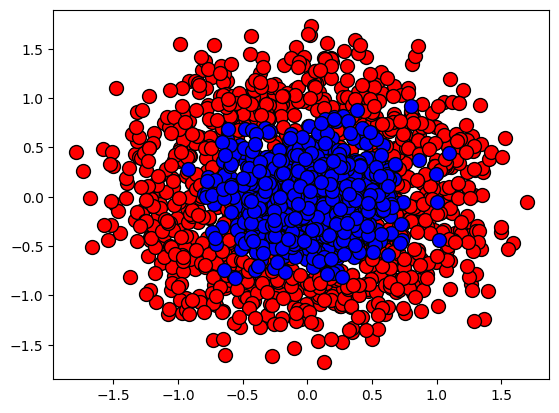

In [61]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ =  roc_curve(y_true, proba)         ### Your code here ### 
    roc_auc = auc(fpr, tpr)              ### Your code here ### 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba) ### Your code here ### 
    pr_auc = average_precision_score(y_true, proba)               ### Your code here ### 
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    


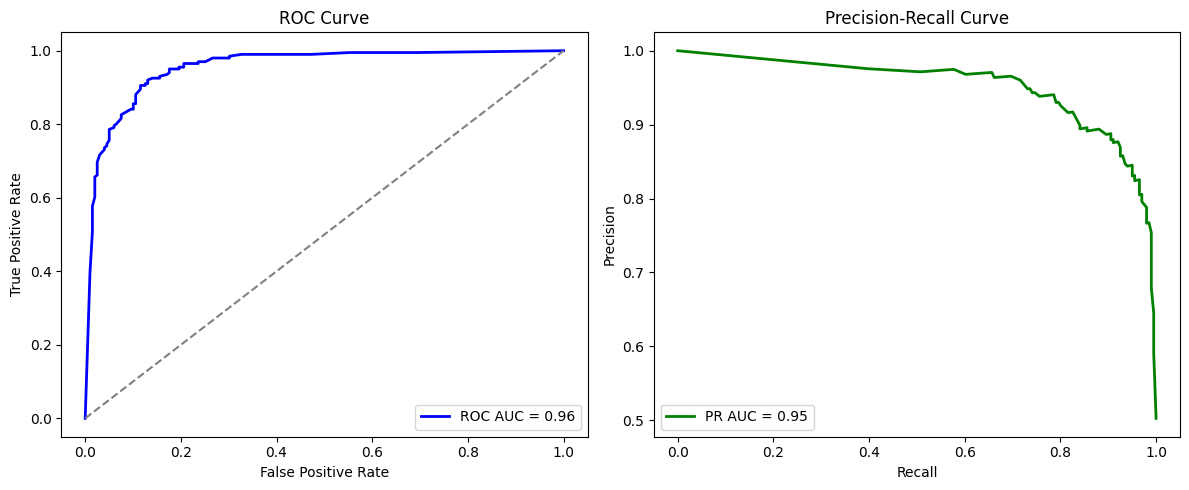

In [63]:
classifier = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
classifier.fit(X_train, y_train)
proba = classifier.predict_proba(X_test)[:,1]
plot_roc_pr(proba, y_test)

In [64]:
classifier = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
classifier.fit(X_train, y_train)
proba = classifier.predict_proba(X_test)
print(f"The probabilities to be part of one of the two classes is:\n {proba}")

The probabilities to be part of one of the two classes is:
 [[1.   0.  ]
 [0.01 0.99]
 [0.96 0.04]
 [0.98 0.02]
 [0.99 0.01]
 [0.92 0.08]
 [0.   1.  ]
 [0.46 0.54]
 [0.01 0.99]
 [0.77 0.23]
 [1.   0.  ]
 [0.43 0.57]
 [0.09 0.91]
 [0.   1.  ]
 [0.   1.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.95 0.05]
 [0.01 0.99]
 [0.01 0.99]
 [0.03 0.97]
 [0.95 0.05]
 [1.   0.  ]
 [0.02 0.98]
 [0.01 0.99]
 [0.99 0.01]
 [0.09 0.91]
 [0.31 0.69]
 [0.18 0.82]
 [0.94 0.06]
 [0.94 0.06]
 [1.   0.  ]
 [0.08 0.92]
 [0.59 0.41]
 [0.04 0.96]
 [0.   1.  ]
 [1.   0.  ]
 [0.59 0.41]
 [0.01 0.99]
 [0.22 0.78]
 [0.43 0.57]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.01 0.99]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.52 0.48]
 [0.04 0.96]
 [0.19 0.81]
 [0.62 0.38]
 [0.02 0.98]
 [0.63 0.37]
 [0.17 0.83]
 [0.01 0.99]
 [0.98 0.02]
 [0.02 0.98]
 [0.08 0.92]
 [0.86 0.14]
 [0.92 0.08]
 [0.97 0.03]
 [0.   1.  ]
 [0.02 0.98]
 [1.   0.  ]
 [0.25 0.75]
 [0.25 0.75]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.93 0.07]
 [1.

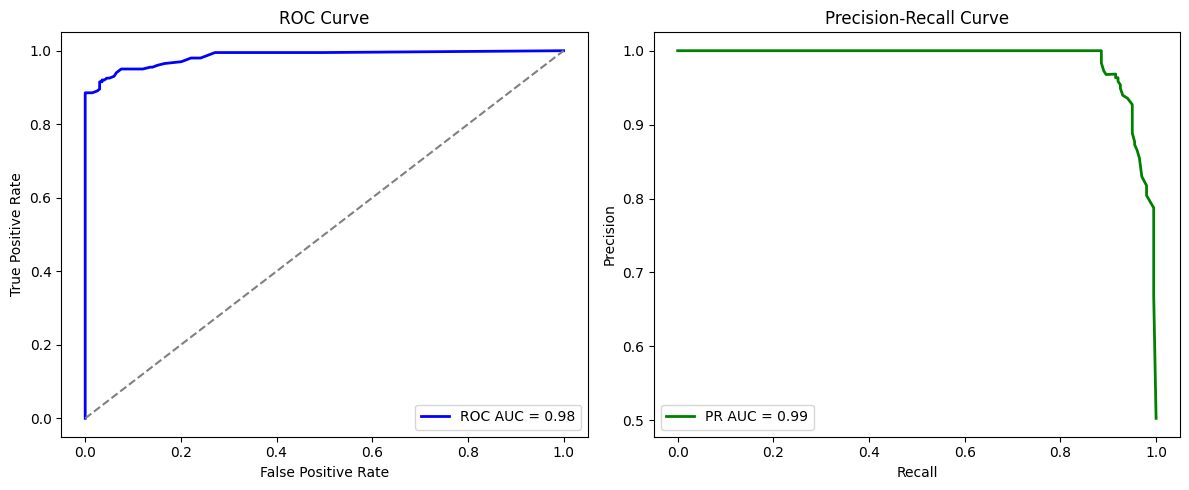

In [65]:
X_sample , y_sample = subsample_data(X, y) 
classifier.fit(X_sample, y_sample)
proba = classifier.predict_proba(X_test)[:,1]
plot_roc_pr(proba, y_test)